In [57]:
import pandas as pd
from google.colab.patches import cv2_imshow
import cv2 as cv
import matplotlib.pyplot as plt

df = pd.read_csv("/content/colors.csv")
df.groupby("name").count()

,id,rgb,is_trans
name,,,
Aqua,1,1,1
Black,1,1,1
Blue,1,1,1
Blue-Violet,1,1,1
Bright Green,1,1,1
...,...,...,...
Violet,1,1,1
White,1,1,1
Yellow,1,1,1


In [24]:
df.groupby("is_trans").count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


# Understanding LEGO Themes vs. LEGO Sets
## Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.


In [27]:
img = cv.imread('/content/lego_themes.png')
cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

## A lego set is a particular box of LEGO or product. Therefore, a single theme typically has have  many different sets.

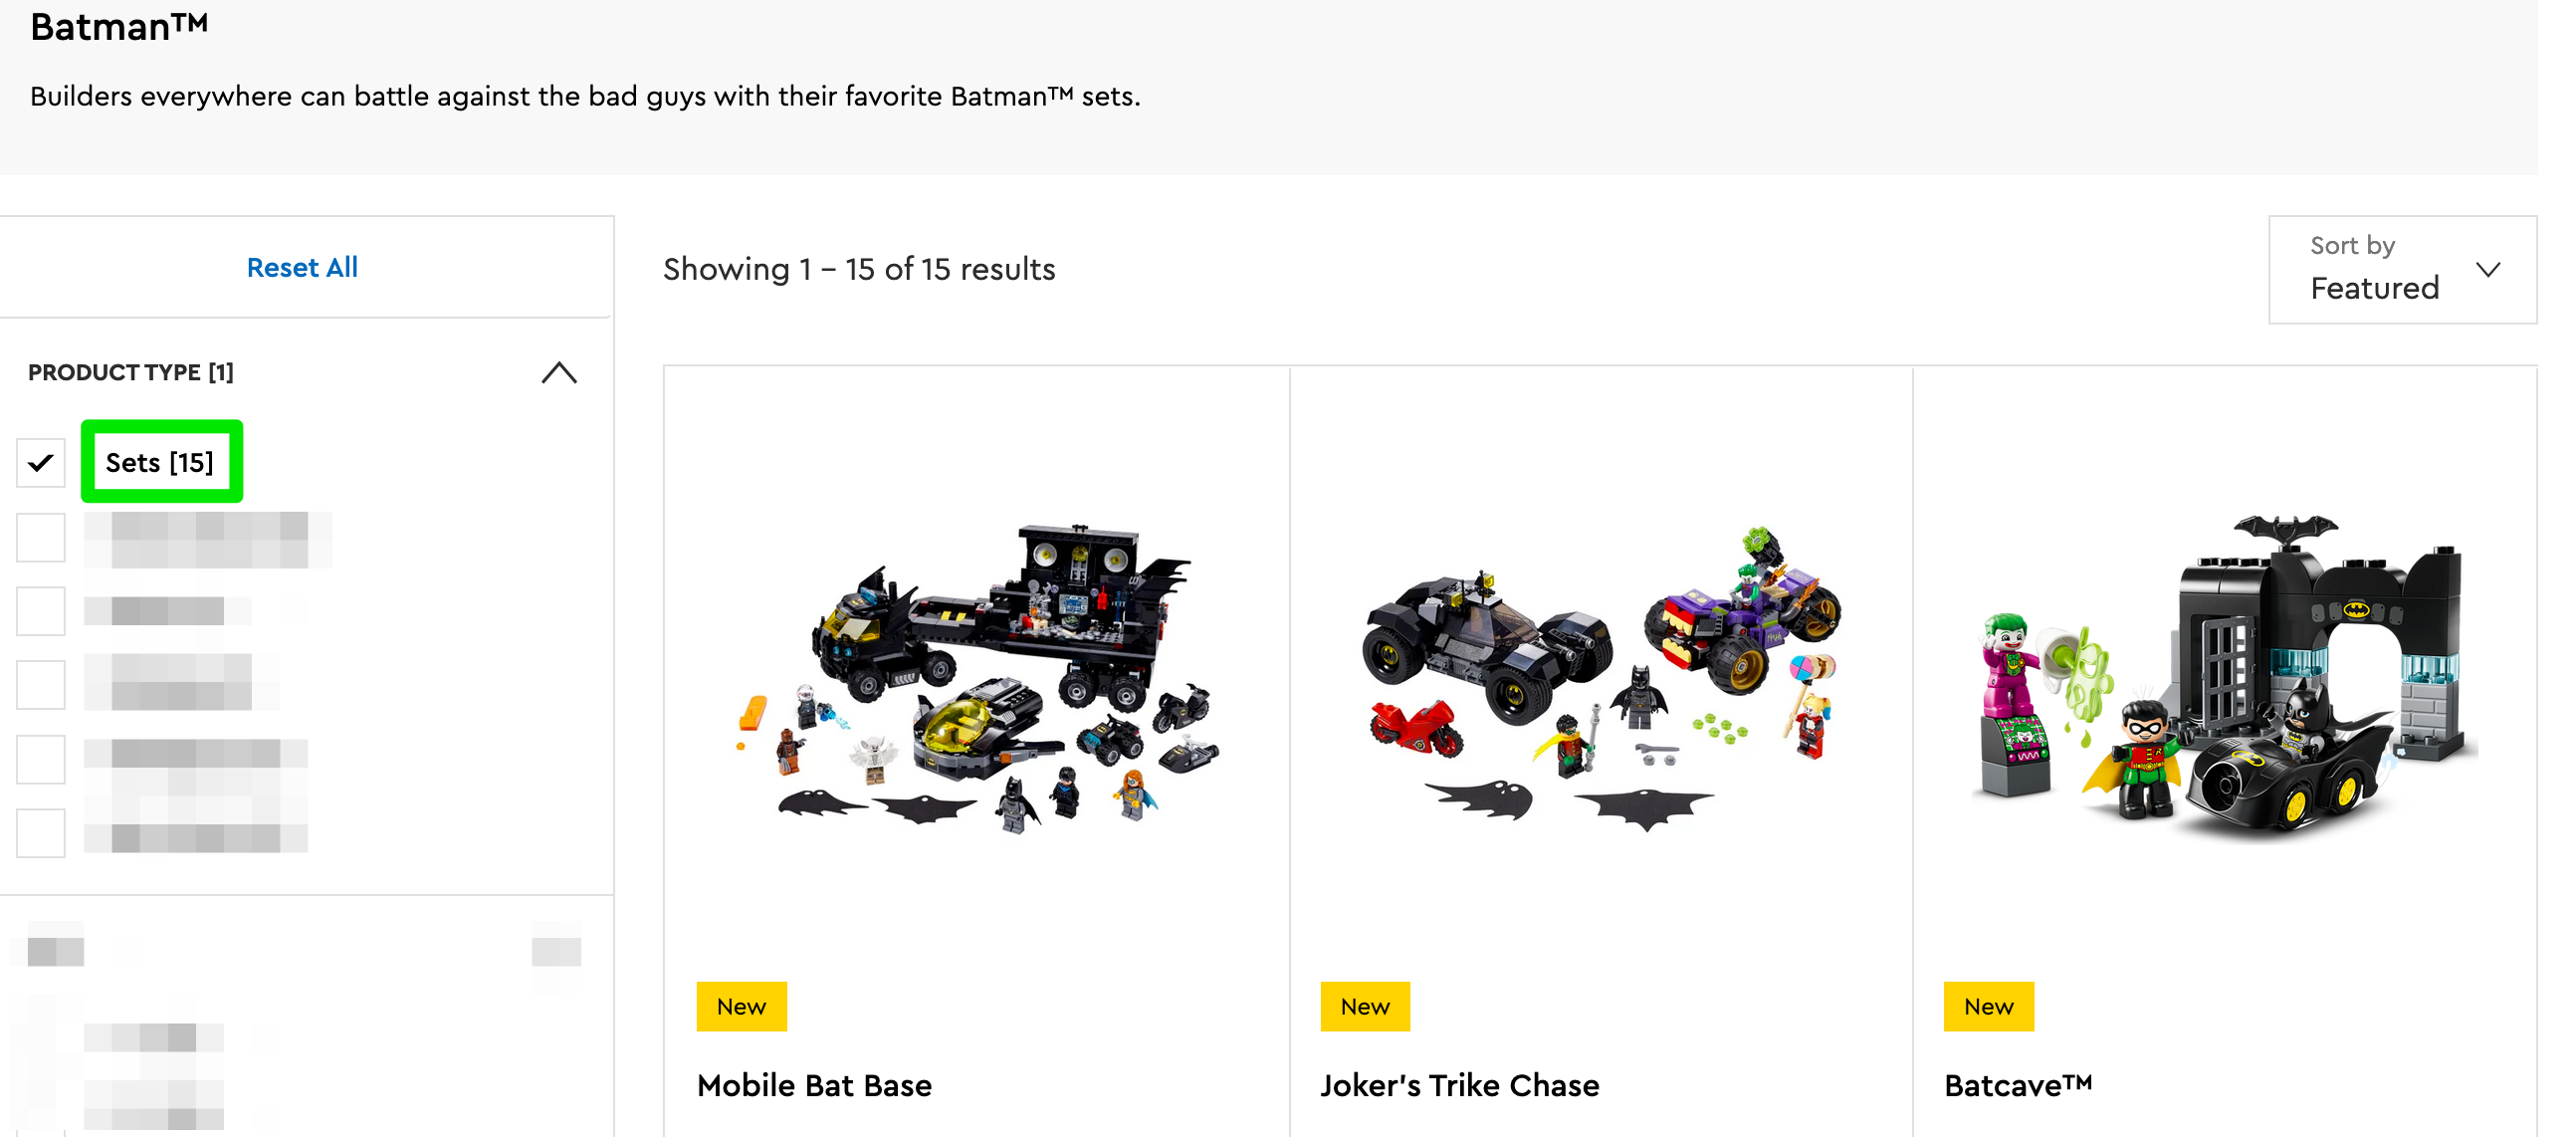

In [28]:
img1 = cv.imread("/content/lego_sets.png")
cv2_imshow(img1)

In [29]:
sets_df = pd.read_csv("/content/sets.csv")
sets_df

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


In [40]:
sets_df["year"].min()

1949

In [41]:
sets_df["name"].loc[sets_df["year"].idxmin()]

'Extra-Large Gift Set (ABB)'

In [42]:
sets_df["set_num"].loc[sets_df["year"].idxmin()]

'700.1-1'

In [50]:
sets_df.groupby("year").count()

,set_num,name,theme_id,num_parts
year,,,,
1949,5,5,5,5
1950,6,6,6,6
1953,4,4,4,4
1954,14,14,14,14
1955,28,28,28,28
...,...,...,...,...
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840


In [56]:
sets_df.sort_values(by="num_parts", ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


In [66]:
sets_by_year = sets_df.groupby("year").count()
sets_by_year["set_num"]

,set_num
year,
1949,5
1950,6
1953,4
1954,14
1955,28
...,...
2017,786
2018,816
2019,840


In [93]:
date_array = sets_by_year.index.to_numpy()
date_array = date_array[:len(date_array) - 2]
date_array

array([1949, 1950, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019])

In [94]:
number_of_sets_array = sets_by_year["set_num"].to_numpy()
number_of_sets_array = number_of_sets_array[:len(number_of_sets_array) - 2]
number_of_sets_array

array([  5,   6,   4,  14,  28,  13,  20,  46,   4,   3,  22,  41,  20,
        18,  13, 111,  28,  39,  81,  37,  51,  39,  70,  39,  39,  76,
        99,  78,  92, 102,  84,  84,  73,  95, 168, 159, 233,  80, 134,
       108, 148, 135, 137, 164, 175, 198, 255, 381, 340, 367, 383, 504,
       441, 395, 351, 313, 315, 341, 421, 435, 503, 607, 605, 690, 774,
       757, 786, 816, 840])

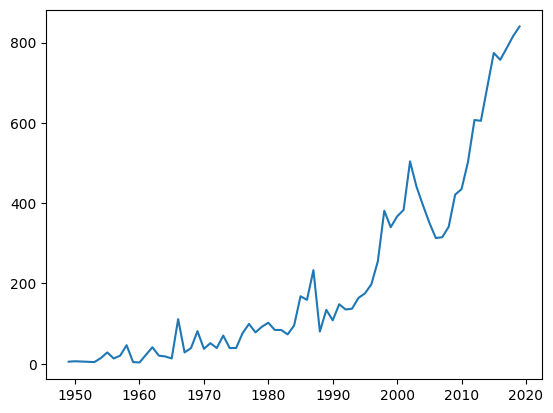

In [96]:
plt.plot(date_array, number_of_sets_array)
plt.show()

In [105]:
themes_by_year = sets_df.groupby("year").agg({"theme_id": pd.Series.nunique})
themes_by_year

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


In [106]:
dates = themes_by_year.index.to_numpy()
dates = dates[:len(dates) - 2]
dates

array([1949, 1950, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019])

In [107]:
ids = themes_by_year["theme_id"].to_numpy()
ids = ids[:len(ids) - 2]
ids

array([ 2,  1,  2,  2,  4,  3,  4,  3,  3,  3,  6,  4,  8,  9,  8, 13, 12,
       16, 18, 18, 14, 13, 17, 14, 15, 26, 22, 25, 20, 32, 26, 24, 29, 30,
       45, 44, 36, 37, 37, 39, 46, 45, 45, 50, 55, 60, 62, 85, 80, 65, 71,
       72, 80, 76, 72, 75, 71, 75, 79, 76, 67, 84, 87, 94, 98, 92, 89, 93,
       78])

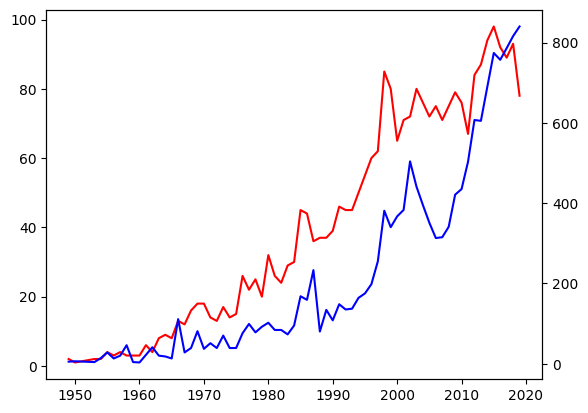

In [114]:
fig, ax1 = plt.subplots()
ax1.plot(dates, ids, color="red")
ax2 = ax1.twinx()
ax2.plot(date_array, number_of_sets_array, color="blue")

plt.show()

In [116]:
parts_per_set = sets_df.groupby("year").agg({"num_parts": pd.Series.mean})
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


In [117]:
parts_per_set.tail()

,num_parts
year,
2017,221.840967
2018,213.618873
2019,207.510714
2020,259.732938
2021,0.000000


In [118]:
date_array =  parts_per_set.index.to_numpy()
date_array = date_array[:len(date_array) - 2]
date_array

array([1949, 1950, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019])

In [120]:
num_parts = parts_per_set["num_parts"].to_numpy()
num_parts = num_parts[:len(num_parts) - 2]
num_parts

array([ 99.6       ,   1.        ,  13.5       ,  12.35714286,
        36.60714286,  18.92307692,  44.75      ,  41.13043478,
        16.25      , 175.33333333,  58.22727273,  79.97560976,
        47.        ,  79.16666667,  86.        ,  46.72972973,
       121.75      , 116.43589744,  74.64197531,  81.67567568,
        77.19607843, 100.76923077, 101.8       , 116.94871795,
       127.94871795, 142.38157895,  87.62626263, 138.6025641 ,
        97.22826087, 112.79411765,  93.01190476,  65.54761905,
        93.82191781,  77.73684211, 105.58928571,  94.22641509,
        65.12017167, 129.5875    ,  91.1119403 , 163.28703704,
       130.91891892, 104.68888889, 124.06569343, 106.14634146,
       141.56      , 154.80808081, 112.55294118, 132.50656168,
       100.92941176,  97.94822888,  97.63446475, 107.30952381,
       157.06802721, 141.55189873, 196.53561254, 236.61980831,
       242.63809524, 244.01466276, 195.39667458, 216.78390805,
       161.89463221, 154.15321252, 180.03140496, 179.91

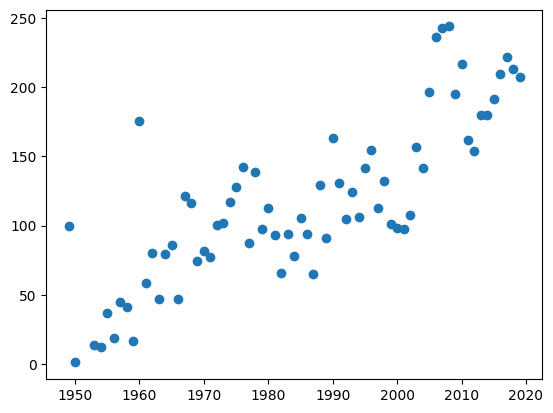

In [121]:
plt.scatter(date_array, num_parts)
plt.show()

<img src="https://i.imgur.com/Sg4lcjx.png">

In [122]:
themes_df = pd.read_csv("/content/themes.csv")
themes_df

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
591,705,Iron Man,696.0
592,706,Spider-Man,696.0
593,707,X-Men,696.0
594,708,The LEGO Batman Movie,697.0


In [133]:
ids = themes_df[themes_df["name"] == "Star Wars"]["id"].to_numpy()
ids

array([ 18, 158, 209, 261])

In [149]:
sets_df[sets_df["theme_id"] == ids[0]]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


In [150]:
sets_df[sets_df["theme_id"] == ids[1]]

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94
...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


In [151]:
sets_df[sets_df["theme_id"] == ids[2]]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


In [152]:
sets_df[sets_df["theme_id"] == ids[3]]

,set_num,name,year,theme_id,num_parts
14630,9748-1,Droid Developer Kit,1999,261,658
14636,9754-1,Dark Side Developers Kit,2000,261,578
